# Combine all df_points to one df
old :2018-2021: 2.547.157 rows

final: 18-21: 2.375.902 rows

In [1]:
import pandas as pd

In [2]:
dfa = pd.read_csv('../data/df_points_nosplit/df_points_2018.csv')
dfb = pd.read_csv('../data/df_points_nosplit/df_points_2019.csv')
dfc = pd.read_csv('../data/df_points_nosplit/df_points_2020.csv')
dfd = pd.read_csv('../data/df_points_nosplit/df_points_2021.csv')

In [3]:
combined = pd.concat([dfa, dfb, dfc, dfd], ignore_index=True)

In [4]:
combined.tail()

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,rain,snow,wind_speed,humidity,year,month,day,start_min,idle_time,idle_time_class
1781370,72058,51.317569,12.382730,1640897593,1,881f1a1609fffff,1,Blaue Zone Leipzig Ost 0€,0,13.19,7.62,0.0,8.94,83.0,2021,12,3,1253,112,2
1781371,71949,51.334711,12.356763,1640897835,1,881f1a1649fffff,1,Pinke Zone Leipzig Ost 1€,0,13.19,7.62,0.0,8.94,83.0,2021,12,3,1257,25,1
1781372,97785,51.367276,12.369792,1640898086,1,881f1a8c8bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.05,2.03,0.0,8.05,84.0,2021,12,3,1261,48,2
1781373,41738,51.366942,12.370322,1640900918,1,881f1a8c8bfffff,1,Pinke Zone Leipzig Ost 1€,0,13.05,2.03,0.0,8.05,84.0,2021,12,3,1309,43,2
1781374,72028,51.332844,12.404319,1640903200,1,881f1a165bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.11,1.14,0.0,8.05,81.0,2021,12,3,1347,32,1


In [5]:
c = combined.sort_values(by=['dt_start'])

In [6]:
c.to_csv('../data/final_nosplit_df_points_18_21.csv', index=False)

# analyse nosplit ds

<AxesSubplot:>

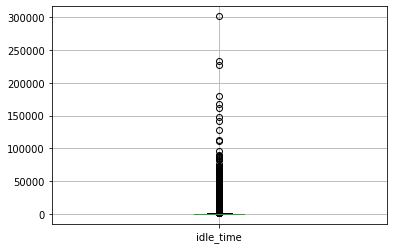

In [7]:
dfbox = pd.DataFrame(c['idle_time'])
dfbox.boxplot()

In [8]:
dfbox.quantile([0.25,0.5,0.75,1])

,idle_time
0.25,41.0
0.50,132.0
0.75,476.0
1.00,301651.0


In [9]:
def f(row):
    if row['idle_time'] < 42:
        val = 1
    elif row['idle_time'] < 132:
        val = 2
    elif row['idle_time'] < 476:
        val = 3
    else:
        val = 4
    return val

c['idle_time_class'] = c.apply(f, axis=1)

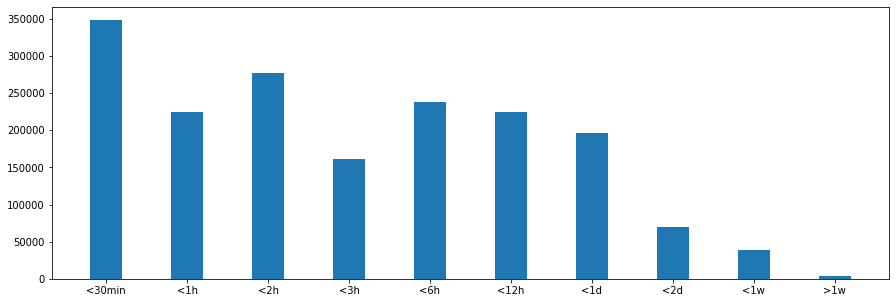

In [10]:
times = ['<30min', '<1h', '<2h', '<3h', '<6h', '<12h', '<1d', '<2d', '<1w', '>1w']
numbers = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for ind in c.index:
    idle = c['idle_time'][ind]
    if (idle < 30):
        numbers[0] += 1
        continue
    elif (idle < 60):
        numbers[1] += 1
        continue
    elif (idle < 120):
        numbers[2] += 1
        continue
    elif (idle < 180):
        numbers[3] += 1
        continue
    elif (idle < 360):
        numbers[4] += 1
        continue
    elif (idle < 720):
        numbers[5] += 1
        continue
    elif (idle < 1440):
        numbers[6] += 1
        continue
    elif (idle < 2880):
        numbers[7] += 1
        continue
    elif (idle < 10080):
        numbers[8] += 1
        continue
    else:
        numbers[9] += 1
        continue

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.bar(times, numbers, width=0.4)

plt.show()